# Venilla Network (i.e. No batch normalization, No dropouts, No learning rates and any other Hyper Parameter Tunings)

## **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras #Update Keras
import keras #Import the Keras

Using TensorFlow backend.


In [0]:
import numpy as np #Import numpy and provide alias as np

from keras.models import Sequential #Import sequential from keras models to create sequential model
from keras.layers import Dense, Dropout, Activation, Flatten, Add #import dense, activation, flatten and add from keras layer
from keras.layers import Convolution2D, MaxPooling2D #import Convolution2D and Maxpooling2D from keras layers
from keras.utils import np_utils #Import np_utils from keras to convert array to binary one hot vector

from keras.datasets import mnist #Import mnist data

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


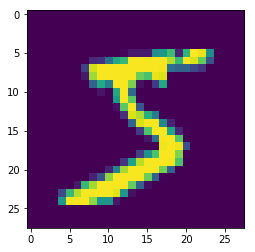

In [4]:
print (X_train.shape) #Print shape of the train dataframe
from matplotlib import pyplot as plt #Import pyplot as plt from matplotlib
%matplotlib inline 
plt.imshow(X_train[0]) #Show/Print the image

## Train Test reshaping data

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Shape of train dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature
X_test = X_test.reshape(X_test.shape[0],28,28,1)#Shape of test dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature

##Data Normalization

In [0]:
X_train = X_train.astype('float32') #Change the data type to float
X_test = X_test.astype('float32') #Change the data type to float
X_train /= 255  # Normalise the data values to a range of [0,1]
X_test /= 255 # Normalise the data values to a range of [0,1]

In [7]:
y_train[:10] #First 10 elements of one dimensional y_train array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10] #First 10 elements of 10 dimensional class array of Y_train


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Vanilla Model Architecture

In [21]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Applying 3X3 filter #26
model.add(Convolution2D(9, 1, activation='relu'))# Applying 1X1 filter#26

model.add(Convolution2D(10, 26))#26
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


###Model Summary

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 9)         297       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 10)          60850     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 61,467
Trainable params: 61,467
Non-trainable params: 0
_________________________________________________________________


###Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 

###Training the Model

In [24]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.2039 - acc: 0.9412
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0745 - acc: 0.9780
Epoch 3/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0546 - acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0436 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0351 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0291 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0220 - acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0179 - acc: 0.9943
Epoch 9/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0139 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0130 - a

###Score the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

###Print Score Accuracy

In [26]:
print(score)

[0.07747436325960844, 0.9813]


###Conclusion

###The Vanilla model without any parameters treatment improving the score accuracy will be difficult